## 3. Get your hands dirty

1. Analyze the data provided and present your conclusions. What suspicious behaviors did
you find? What led you to this conclusion? What actions would you take?

2. In addition to the spreadsheet data, what other data would you consider to find patterns
of possible fraudulent behavior?

3. Considering your conclusions, what would you further suggest in order to prevent frauds
and/or chargebacks?

4. Create a simple anti-fraud.
An Anti-fraud works by receiving information about a transaction and inferring whether it is a fraudulent
transaction or not. We work mostly with Ruby and Python, but you can use any programming language that
you want.
Please use the data provided on challenge 2 to test your solution. Consider that transactions with the flag
has_cbk = true are transactions with fraud chargebacks.
Your Anti-fraud must return a recommendation to approve or deny the transaction.


# Libs & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

***

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97/raw/295d9f7cb8fdf08f3cb3bdf1696ab245d5b5c1c9/transactional-sample.csv')
df.head()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [3]:

# First, I'll calculate the unique users
unique_users = df['user_id'].nunique()
print(f"Total Unique Users: {unique_users}")


Total Unique Users: 2704


In [4]:
# Then I'll calculate the average of their expenses
average_expenses = df.groupby('user_id')['transaction_amount'].describe().reset_index()
print("Expenses statistics per User:")
display(average_expenses)

average_expenses.to_csv('average_expenses_per_user.csv', header= True )

Expenses statistics per User:


,user_id,count,mean,std,min,25%,50%,75%,max
0,6,1.0,443.90,NaN,443.90,443.90,443.90,443.90,443.90
1,7,1.0,359.68,NaN,359.68,359.68,359.68,359.68,359.68
2,8,1.0,2416.70,NaN,2416.70,2416.70,2416.70,2416.70,2416.70
3,19,1.0,165.14,NaN,165.14,165.14,165.14,165.14,165.14
4,132,1.0,714.56,NaN,714.56,714.56,714.56,714.56,714.56
...,...,...,...,...,...,...,...,...,...
2699,99863,1.0,466.64,NaN,466.64,466.64,466.64,466.64,466.64
2700,99875,1.0,191.08,NaN,191.08,191.08,191.08,191.08,191.08
2701,99876,1.0,1421.20,NaN,1421.20,1421.20,1421.20,1421.20,1421.20
2702,99948,1.0,184.61,NaN,184.61,184.61,184.61,184.61,184.61


In [5]:
# Analyze for suspicious behavior:
# 1. Multiple transactions from different device_id but the same user_id (in case of stolen user data)
device_usage = df.groupby('user_id')['device_id'].nunique()
suspicious_users = device_usage[device_usage > 1].index.tolist()
print("Suspicious users (using multiple devices):", suspicious_users)

Suspicious users (using multiple devices): [7725, 9600, 9853, 10241, 10378, 11750, 18205, 25385, 27939, 31819, 34548, 55007, 56877, 68468, 70198, 71424, 81594, 83258, 84940, 88553, 90148, 90182, 92034, 99396]


,user_id,count,mean,std,min,25%,50%,75%,max
211,7725,7.0,1546.134286,994.399033,10.14,1007.3500,1576.680,2313.4150,2594.59
247,9600,2.0,2987.500000,1341.933107,2038.61,2513.0550,2987.500,3461.9450,3936.39
254,9853,9.0,128.867778,204.003065,1.30,19.1700,22.950,84.4000,567.14
267,10241,5.0,1414.840000,938.134786,139.56,867.0300,1522.160,2037.6700,2507.78
270,10378,3.0,302.763333,268.153695,20.17,177.3150,334.460,444.0600,553.66
302,11750,31.0,574.718065,126.028873,10.46,534.6500,607.450,646.4500,688.87
493,18205,4.0,723.460000,583.019048,216.25,400.7575,561.630,884.3325,1554.33
673,25385,2.0,4057.415000,19.028243,4043.96,4050.6875,4057.415,4064.1425,4070.87
732,27939,3.0,1858.996667,1048.605367,1177.96,1255.2300,1332.500,2199.5150,3066.53
834,31819,4.0,732.080000,655.684425,10.29,427.1175,662.720,967.6825,1592.59


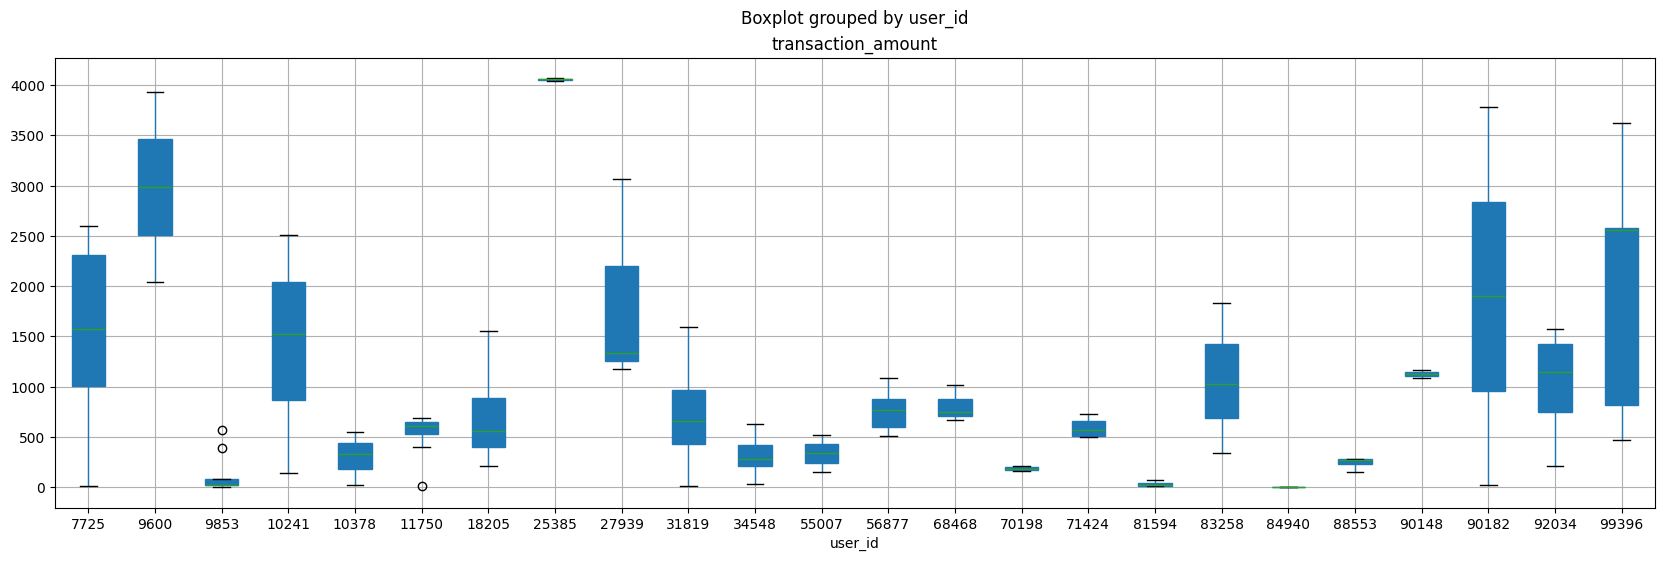

In [6]:
display (average_expenses[average_expenses.user_id.isin(suspicious_users)])
fig, ax = plt.subplots(figsize=(20, 6))
df[df.user_id.isin(suspicious_users)][['user_id','transaction_amount']].boxplot(column='transaction_amount', by='user_id', patch_artist=True, ax=ax)
plt.show()


In [7]:
# 2. High frequency of transactions from the same user_id within a short period

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
user_transactions = df.groupby('user_id').resample('D', on='transaction_date')['transaction_id'].count()
suspicious_users = user_transactions[user_transactions > 5].index.get_level_values('user_id').tolist()
print("Suspicious Users (high frequency of transactions):", suspicious_users)



Suspicious Users (high frequency of transactions): [3584, 11750, 11750, 49106, 56877, 75710, 79054, 79054, 96025]


In [8]:
# 3. Transactions flagged with has_cbk = true
fraudulent_transactions = df[df['has_cbk'] == True]

# Finding patterns in fraudulent transactions
fraud_device_usage = fraudulent_transactions['device_id'].value_counts()
fraud_user_usage = fraudulent_transactions['user_id'].value_counts()
print("Devices involved in fraudulent transactions:", fraud_device_usage)
print("Users involved in fraudulent transactions:", fraud_user_usage)

Devices involved in fraudulent transactions: device_id
563499.0    19
101848.0    15
342890.0    15
438940.0    13
547440.0    12
            ..
548247.0     1
645413.0     1
918124.0     1
53477.0      1
207247.0     1
Name: count, Length: 129, dtype: int64
Users involved in fraudulent transactions: user_id
11750    25
91637    19
79054    15
96025    13
78262    12
         ..
11858     1
60263     1
69973     1
16781     1
24027     1
Name: count, Length: 153, dtype: int64


In [12]:
# Summary of suspicious behaviors
#print(f"Total Suspicious Devices: {len(suspicious_users)}")
print(f"Total Suspicious Users: {len(suspicious_users)}")

Total Suspicious Users: 9


### 2. In addition to the spreadsheet data, what other data would you consider to find patterns of possible fraudulent behavior?

Id' consider:
* geolocation data, like IP adresses, location data to detect anomalies in usual purchasing locations
* transaction timing, to analyze time of the day when transactions are made to spot unusual patterns
* merchant category, to analize the typoo of merchant involved in transactions
* patterns of user behavior over time



### 3. Considering your conclusions, what would you further suggest in order to prevent frauds and/or chargebacks?

Based on the analysis, I would consider these measures:
 * Track device usage patterns to identify anomalies
 * Monitor user behavior to detect deviations from normal patterns
 * Require additional verification for suspicious transactions
 * Limit the number of transactions within a certain time frame for a single user/device.



### 4: Create a Simple Anti-Fraud System

In [13]:
df

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,2019-11-01 13:05:34.054967,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,2019-11-01 11:47:02.404963,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,2019-11-01 10:23:50.555604,1.55,NaN,False
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,False


In [14]:
# Using a simple boxplot-like outlier detection
average_expenses['IQR'] = average_expenses['75%'] - average_expenses['25%']
average_expenses['upper_bound'] = average_expenses['IQR']*1.5 + average_expenses['75%']


def outlier(row):
    user=row['user_id']
    upper_bound = average_expenses.set_index('user_id').loc[user, 'upper_bound']

    if row['transaction_amount'] > upper_bound:
        return True
    return False

    
# Outlier transactions
df['outlier'] = df.apply(lambda row: outlier(row), axis=1)
df['outlier'].value_counts()

outlier
False    3188
True       11
Name: count, dtype: int64

In [15]:

# First, I'm going to analyze suspicious devices and users based on the previous analysis
device_usage = df.groupby('device_id')['user_id'].nunique()
suspicious_devices = device_usage[device_usage > 1].index.tolist()

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
user_transactions = df.groupby('user_id').resample('D', on='transaction_date')['transaction_id'].count()
suspicious_users = user_transactions[user_transactions > 5].index.get_level_values('user_id').tolist()

fraudulent_transactions = df[df['has_cbk'] == True]
fraud_device_usage = fraudulent_transactions['device_id'].value_counts()
fraud_user_usage = fraudulent_transactions['user_id'].value_counts()


def anti_fraud(transaction):
    user_id = transaction['user_id']
    device_id = transaction['device_id']
    
    # Then I'll check if the user is flagged as suspicious
    if device_id in suspicious_devices:
        return 'Deny'
    
    # Then check if the user has multiple fraudulent transactions
    if user_id in suspicious_users:
        return 'Deny'
    
    
    return 'Approve'

# Now I'll apply the anti-fraud function to the dataset
df['recommendation'] = df.apply(anti_fraud, axis=1)

# Time to evaluate the anti-fraud system's performance
fraud_cases = df[df['has_cbk'] == True]
correct_rejections = fraud_cases[fraud_cases['recommendation'] == 'Deny'].shape[0]
total_fraud_cases = fraud_cases.shape[0]

print(f"Correctly Rejected Fraudulent Transactions: {correct_rejections}/{total_fraud_cases}")

# To save the results
df.to_csv('transaction_data_with_recommendations.csv', index=False)

Correctly Rejected Fraudulent Transactions: 72/391


In [16]:
df[df['has_cbk'] == False]['recommendation'].value_counts(normalize= True)


recommendation
Approve    0.992165
Deny       0.007835
Name: proportion, dtype: float64

              precision    recall  f1-score   support

       False       0.97      0.80      0.87       550
        True       0.40      0.83      0.54        90

    accuracy                           0.80       640
   macro avg       0.69      0.82      0.71       640
weighted avg       0.89      0.80      0.83       640



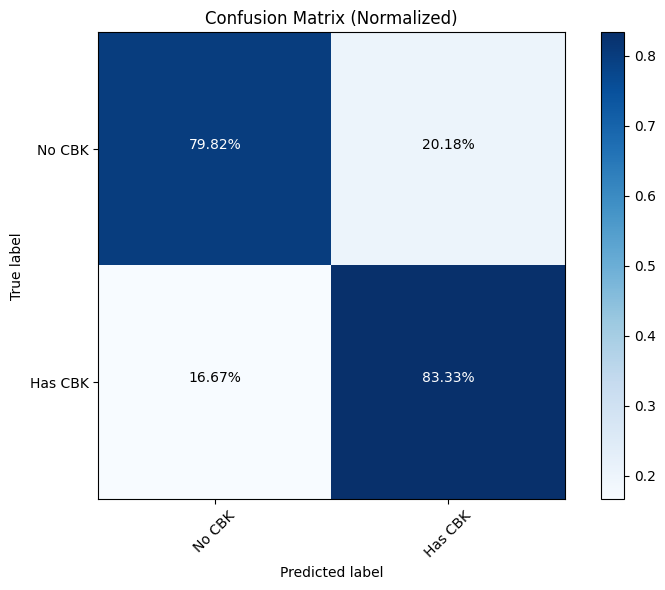

      user_id  device_id  merchant_id  card_number  transaction_amount  \
2441      741        360          960         1646             1084.91   
927      2081       1313         1305          936             3259.04   
602       642         30         1588         2034              852.75   
2463     1303       1066          240         2552               10.30   
2476     2615        565         1431         2189              275.35   

      hour_of_day  has_cbk  Prediction  
2441           16     True       False  
927            17     True        True  
602            16    False       False  
2463           14    False       False  
2476           12    False       False  
Accuracy: 0.80
Precision: 0.40
Recall: 0.83
F1-score: 0.54


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Load the dataset
url = 'https://gist.githubusercontent.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97/raw/295d9f7cb8fdf08f3cb3bdf1696ab245d5b5c1c9/transactional-sample.csv'
df = pd.read_csv(url)

# Step 2: Preprocess the data
# Convert categorical variables to numerical using label encoding
categorical_columns = ['device_id', 'user_id', 'merchant_id', 'card_number']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Convert transaction_date to hour of the day
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['hour_of_day'] = df['transaction_date'].dt.hour

# Select relevant features and handle missing values if any
selected_features = ['user_id', 'device_id', 'merchant_id', 'card_number', 'transaction_amount', 'hour_of_day', 'has_cbk']
df = df[selected_features].dropna()

# Split data into training and testing sets
X = df.drop(columns=['has_cbk'])
y = df['has_cbk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Handle class imbalance using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Step 4: Train a model (using Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate and display performance
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix with percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalize by true class
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Normalized)')
plt.colorbar()
classes = ['No CBK', 'Has CBK']  # Update based on your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2%'  # Format as percentage
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Optionally, join predictions back to the original dataframe
predictions = pd.DataFrame({'Prediction': y_pred}, index=X_test.index)
result_df = pd.concat([df.loc[X_test.index], predictions], axis=1)
print(result_df.head())

# Display performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
